In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
COIN_BLOCK_INFO_PATH = "coin_block_info"

coin = "EXVO"
# coin = "RVN"
# coin = "PGN"
# coin = "LUX"
# coin = "PROTON"
# coin = "RDEN"

fname = os.path.join(COIN_BLOCK_INFO_PATH, coin+"_block_info.csv")

In [3]:
df = pd.read_csv(fname)

In [4]:
df['date'] = pd.to_datetime(df['time'],unit='s')

In [5]:
print("Number of Blocks: {}".format(df.count()[0]))

Number of Blocks: 2000


In [6]:
print("Latest Block: {}".format(int(df["height"][0])))

Latest Block: 46759


In [7]:
df.head(5)

,difficulty,height,nonce,time,date
0,258.628312,46759.0,3.851095e+09,1.525598e+09,2018-05-06 09:06:12
1,229.406553,46758.0,3.946390e+09,1.525598e+09,2018-05-06 09:06:10
2,235.936322,46757.0,2.978972e+09,1.525598e+09,2018-05-06 09:06:08
3,202.654555,46756.0,5.694203e+08,1.525598e+09,2018-05-06 09:06:02
4,196.054363,46755.0,1.588360e+09,1.525598e+09,2018-05-06 09:05:47


In [8]:
df_block_rate = df[['height','time']]
df_block_rate.head(3)

,height,time
0,46759.0,1.525598e+09
1,46758.0,1.525598e+09
2,46757.0,1.525598e+09


In [9]:
MA_window = min(400, int((df_block_rate.count()[0]-1)*0.5))
print("MA Windows = {}".format(MA_window))

MA Windows = 400


In [10]:
df_block_rate = df_block_rate.diff(-MA_window).dropna()
df_block_rate.head(5)

,height,time
0,400.0,27268.0
1,400.0,27275.0
2,400.0,27304.0
3,400.0,27316.0
4,400.0,27357.0


In [11]:
df_block_rate['block_per_day']=df_block_rate['height']/df_block_rate['time']*3600*24

In [12]:
df_block_rate.head(5)

,height,time,block_per_day
0,400.0,27268.0,1267.419686
1,400.0,27275.0,1267.094409
2,400.0,27304.0,1265.748608
3,400.0,27316.0,1265.192561
4,400.0,27357.0,1263.296414


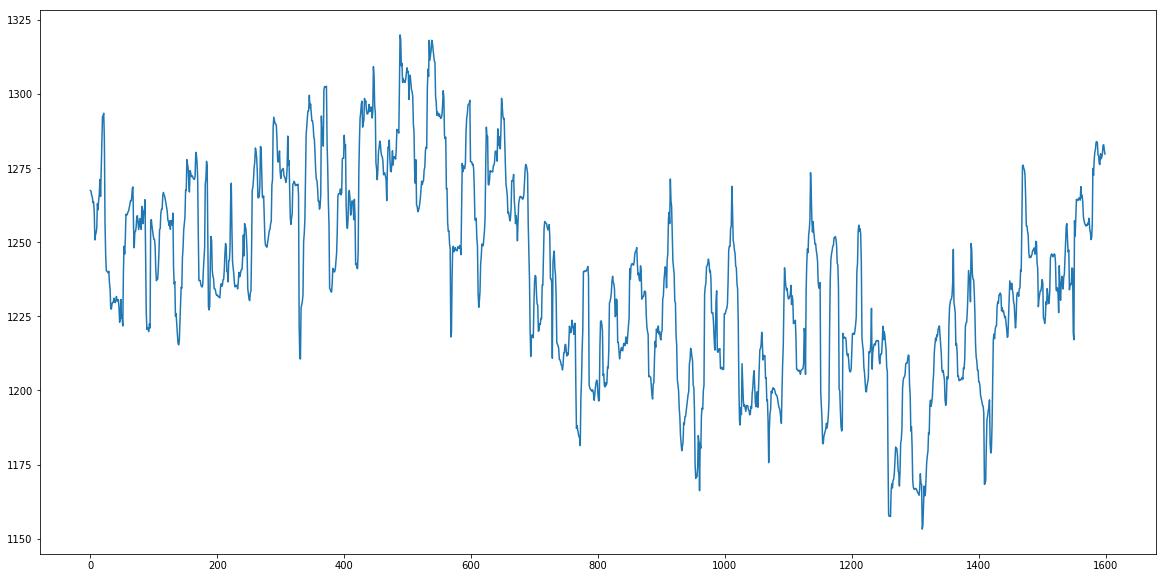

In [13]:
fig = plt.figure(figsize=(20,10))
x_axis = df_block_rate['height']
y_axis = df_block_rate['block_per_day']
plt.plot(y_axis)
# plt.plot(x_axis, y_axis)
# fig.suptitle('Block_Speed vs Block Height', fontsize=20)
# plt.xlabel('Block Height', fontsize=18)
# plt.ylabel('Block Speed', fontsize=18)

In [14]:
block_speed_latest = int(df_block_rate['block_per_day'][0])

In [15]:
print("Coin [{}] Block Speed is {} Blocks/Day".format(coin, block_speed_latest))

Coin [EXVO] Block Speed is 1267 Blocks/Day
